# 문제정의
- 타이타닉 데이터를 사용해서 생존자와 사망자를 예측해보자
- kaggle 경진대회에서 높은 순위를 차지

# 데이터 수집
- kaggle 사이트로부터 데이터 수집

In [1]:
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

In [2]:
# 마크다운 상태에서는 html 태그가 사용가능하다

- 분석 feature : Pclass, Age, SibSp, Parch, Fare...
- 예측 target label : Survived

- feature 

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer 
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

# 데이터 전처리

## 정답컬럼 분리

In [3]:
y_train = train['Survived']

## 결측치 확인
- info() 로 확인
- 처음에는 최빈값으로 결측치를 채워보고 분석을 해보자 ->> 그다음부터 생각해서 채워넣기!

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 총 891개인데 그것보다 수가 적은 컬럼은 결측치가 존재한다는 것이다
# ->> age, cabin, embarked
# object 타입도 전처리 해야한다!

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# 총 418개인데 그것보다 수가 적은 컬럼은 결측치가 존재한다는 것이다
# ->> age, fare, cabin
# object 타입도 전처리 해야한다!

## PassengerId 삭제

In [8]:
# 아무런 연관이 없는 passengerId 는 삭제한다

In [9]:
train.drop('PassengerId', axis = 1, inplace =True)
test.drop('PassengerId', axis = 1, inplace =True)

In [10]:
train.shape, test.shape

((891, 11), (418, 10))

##  Embarked 채우기
- 최빈값으로 채우기(가장많이 나오는수를 최빈값이라고 한다)

In [11]:
train['Embarked'].value_counts() ## value_counts() ->> 어떤 데이터가 얼마나 있는지 개수 파악

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train['Embarked'].fillna('S', inplace = True) # fillna() ->> 결측치 값 채워넣는 함수

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Fare 채우기
- 중앙값 or 평균값 사용 ( 연속적인 수치형 데이터 이기 때문이다)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [15]:
test['Fare'].describe()
# max 값을 보니 이상치가 존재함!
# 이상치가 존재할 경우는 중앙값을 사용하는 것이 좋다

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [16]:
test['Fare'].fillna(14.4542, inplace = True)

## Age 채우기
- 다른 컬럼과의 상관관계를 통해서 데이터 채우기
- 보다 정확한 값을 채워넣을 수 있다

In [17]:
# corr() : 수치형 컬럼들간의 상관관계를 확인하는 함수
train.corr()
# 부호가 + 면 양의 상관관계, - 면 음의 상관관계
# 양의 상관관계 : 대상 컬럼이 커지면 관계된 컬럼도 커진다
# 음의 상관관계 : 대상 컬럼이 작아지면 관계된 컬럼은 커진다
# 숫자는 1에 가까울수록 상관도가 높고 0에 가까울수록 상관도가 낮다
# 데이터를 판단할 때는 뒤의 숫자로 판단한다!!!!!!!!
# 아래 데이터 같은 경우는 Pclass 가 상관도가 높다

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


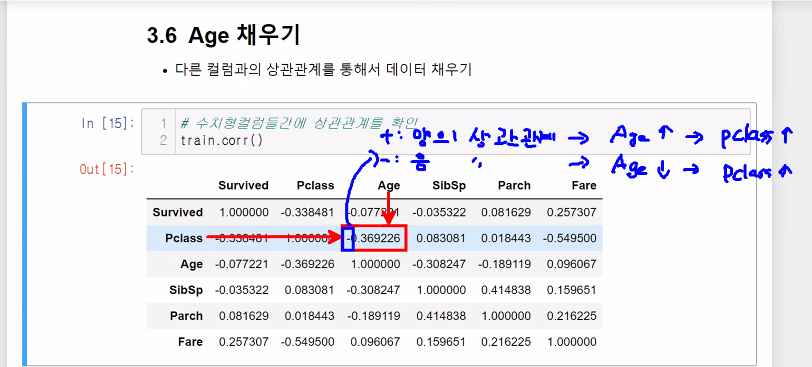

In [18]:
age_table = train[['Pclass', 'Sex', 'Age']].groupby(by = ['Pclass', 'Sex']).median() # median : 중앙값확인하는 함수

In [19]:
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [20]:
train.iloc[5]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 5, dtype: object

### Age의 결측치를 채워줄 함수 만들기

In [21]:
import numpy as np

In [22]:
def fill_age(person) :
    if np.isnan(person['Age']) :  #person 컬럼의 age가 nan 이라면 True 반환
        return age_table.loc[person['Pclass'], person['Sex']][0]
    else :
        return person['Age']

In [23]:
# apply 함수 : 행이나 열 별로 데이터를 출력하고 지정해둔 함수에 적용 한다
train['Age'] = train.apply(fill_age, axis = 1)

In [24]:
test['Age'] = test.apply(fill_age, axis = 1)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


## Cabin 채우기
- 결측치의 비율이 너무 높기 때문에 결측치 자체를 하나의 데이터로 활용

In [27]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [29]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [30]:
train['Cabin'].fillna('N', inplace = True)

In [31]:
test['Cabin'].fillna('N', inplace = True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


# 탐색적 데이터분석

In [34]:
# 시각화 라이브러리
import seaborn as sns

## Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

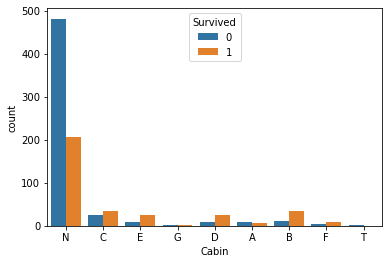

In [35]:
sns.countplot(data = train, x = 'Cabin', hue = 'Survived')

- N에서 사망한 사람의 비율이 높다.
- 임의로 채운 N값을 분석에 사용해도 괜찮다

## Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

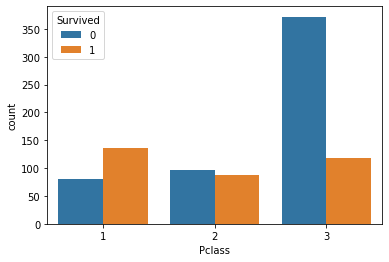

In [36]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

## Embarked와 Pclass 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

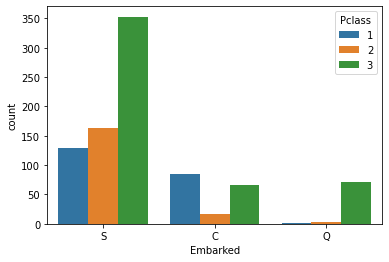

In [37]:
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')

## Sex, Age, Survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

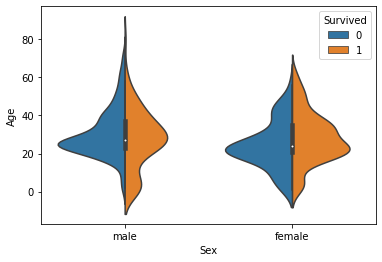

In [38]:
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', split = True ) #생존률을 나이와 성별로 시각화

## Sibsp, Parch 시각화
- 특성공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보를 추출하는 행위
- Sibsp + Parch + 1(본인을포함해야하기때문에) = Family_size 컬럼 생성

In [39]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

In [40]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

<AxesSubplot:xlabel='Family_size', ylabel='count'>

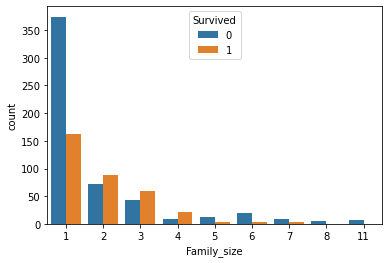

In [41]:
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')

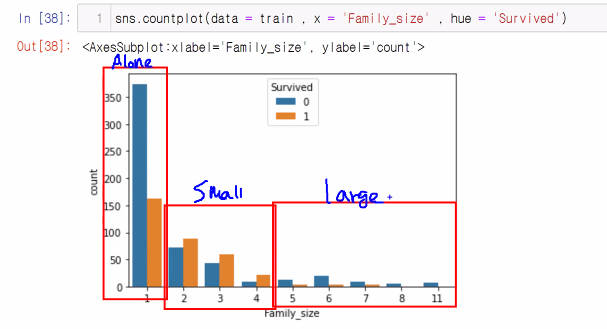

In [42]:
bins = [0, 1, 4, 20] # 구간에 대한 정보
# 0~1 , 1~4 , 4 ~ 20 -> 0초과 1이하, 1초과 4이하 , 4초과 20 이하
labels = ['Alone', 'Small', 'Large'] # 구간에 대한 범주 이름

In [43]:
train['Family_group'] =  pd.cut(train['Family_size'], bins = bins, labels = labels)
test['Family_group'] =  pd.cut(test['Family_size'], bins = bins, labels = labels)
#pd/.cut(들어갈 데이터, 구간정보, 구간 범주)

In [44]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N,S,1,Alone
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1,Alone
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,N,S,4,Small
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1,Alone


### Family_group 시각화

<AxesSubplot:xlabel='Family_group', ylabel='count'>

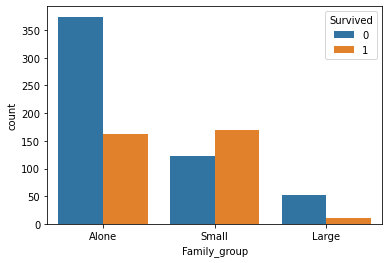

In [45]:
sns.countplot(data = train, x = 'Family_group', hue = 'Survived')

## Text 데이터
- Name. Tricket ->> 비정형데이터
- 비정형 데이터 : 사용하는 단어나 길이가 전부 다르다.
- 비정형 데이터를 정형 데이터로 변경해서 사용할 수 있게 바꾸자!

In [46]:
train['Name'][0].split(',')[1].split('.')[0].strip() #  ' , ' , '.' 를 기준으로 앞과 뒤로 데이터를 나눠준다
#strip() 데이터의 공백을 삭제해준다

'Mr'

### Name 전처리 함수 만들기

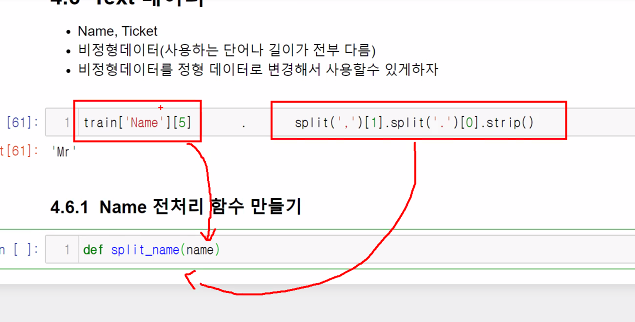

In [47]:
def split_name(name) :
    return name.split(',')[1].split('.')[0].strip()

In [48]:
train['Name'] = train['Name'].apply(split_name) # 행과 열에 대한 기준이 없는 1차원데이터 이기 때문에 axis 필요 없음!
test['Name'] = test['Name'].apply(split_name)

In [49]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [50]:
#라벨인코딩

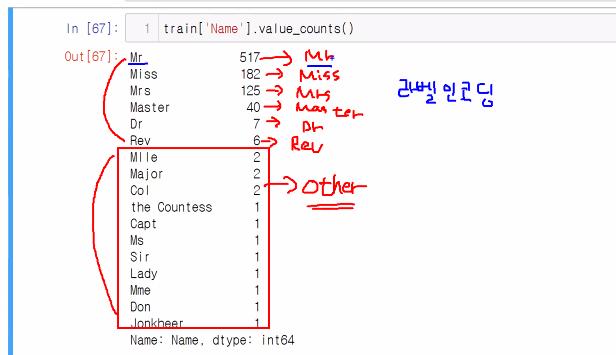

In [51]:
convert_title_dic = {
    'Mr' : 'Mr' , 
    'Mrs' : 'Mrs', 
    'Miss' : 'Miss', 
    'Master' : 'Master', 
    'Don' : 'Other', 
    'Rev' : 'Rev', 
    'Dr': 'Dr', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other', 
    'Capt' : 'Other', 
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [52]:
train['Name'] = train['Name'].map(convert_title_dic)
test['Name'] = test['Name'].map(convert_title_dic)

In [53]:
train['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name, dtype: int64

### Ticket 전처리

In [54]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [55]:
# 일정한 공통점이 없고 양 200명만 공통된 티켓을 사용했기 때문에 과감히 삭제!
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [56]:
train.shape, test.shape

((891, 12), (418, 11))

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Fare          891 non-null    float64 
 8   Cabin         891 non-null    object  
 9   Embarked      891 non-null    object  
 10  Family_size   891 non-null    int64   
 11  Family_group  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


## 글자 데이터를 숫자데이터로 변경
- 원핫 인코딩
- Name, Sex, Cabin, Embarked, Family_group

In [58]:
categorical_feacture = ['Name', 'Sex', 'Cabin', 'Embarked', 'Family_group']

In [59]:
train.drop('Survived', axis = 1, inplace = True)

In [60]:
train['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [61]:
test['Cabin'].unique()

array(['N', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [62]:
# train 과 test의 컬럼 갯수가 다르기 때문에 합친후 다시 나눈다

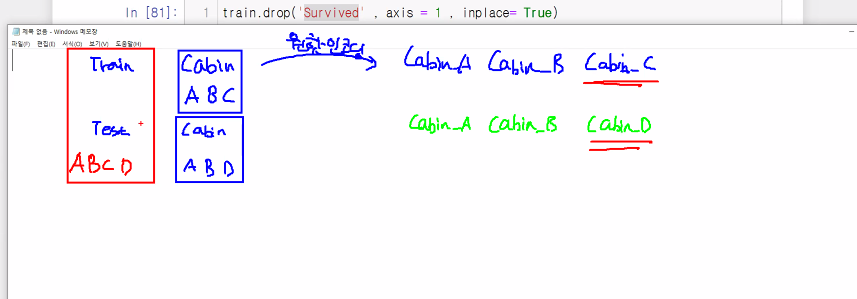

In [63]:
combined = pd.concat([train,test], ignore_index = True)

In [64]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone
1305,1,Other,female,39.0,0,0,108.9000,C,C,1,Alone
1306,3,Mr,male,38.5,0,0,7.2500,N,S,1,Alone
1307,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone


In [65]:
#원한 인코딩
one_hot = pd.get_dummies(combined[categorical_feacture])
one_hot.shape

(1309, 24)

In [66]:
combined.drop(categorical_feacture, axis = 1, inplace = True)

In [67]:
combined = pd.concat([combined, one_hot], axis = 1 )

In [68]:
combined.shape

(1309, 30)

# 모델선택 및 하이퍼 파라미터 튜닝

## 데이터 나누기

In [69]:
X_train = combined.iloc[:891]
X_test = combined.iloc[891:]

In [70]:
X_train.shape, X_test.shape, y_train.shape

((891, 30), (418, 30), (891,))

## 모델 불러오기

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
tree_model = DecisionTreeClassifier()

In [73]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
pre = tree_model.predict(X_test)

In [75]:
pre

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [76]:
gender_sub = pd.read_csv('./data/gender_submission.csv')
gender_sub['Survived'] = pre # 모델의 예측결과를 제출양식에 담기
gender_sub.to_csv('mysub01.csv', index = False) # csv 파일 만들기

## 교차검증

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
result = cross_val_score(tree_model, X_train, y_train, cv = 5)
result.mean()

0.7889962965287803

In [79]:
tree_model.score(X_train, y_train) # 과대적합

0.9865319865319865

## RandomForest
- 예측을 잘하는 모델이다!!!!
- 간단히 설명하자면 Decision Tree 를 여러개 사용하는 것(DT의 파라매터를 가지고있음)

In [80]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200) # 200개의 DecisionTree 사용

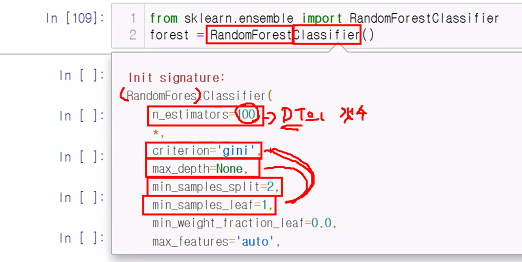

In [81]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [82]:
result = cross_val_score(forest, X_train, y_train, cv = 5)
result.mean()

0.7979725064339966

In [84]:
pre = forest.predict(X_test)

In [85]:
pre

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [86]:
gender_sub = pd.read_csv('./data/gender_submission.csv')
gender_sub['Survived'] = pre # 모델의 예측결과를 제출양식에 담기
gender_sub.to_csv('mysub02.csv', index = False) # csv 파일 만들기

In [ ]:
#데이터 스케일링(Data Scaling)

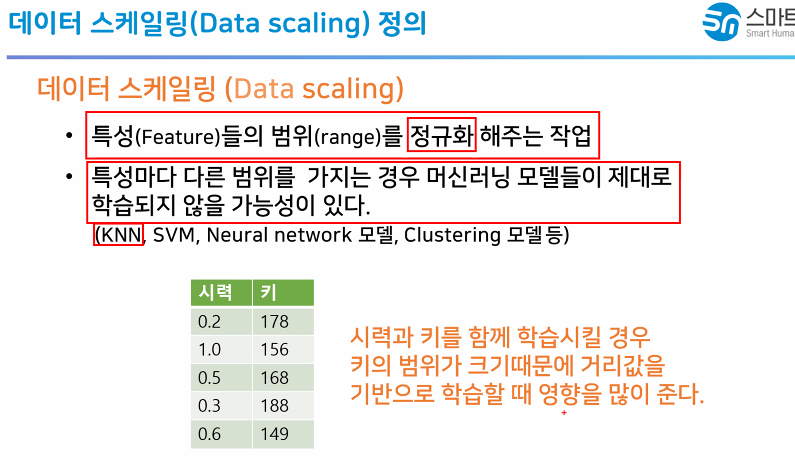

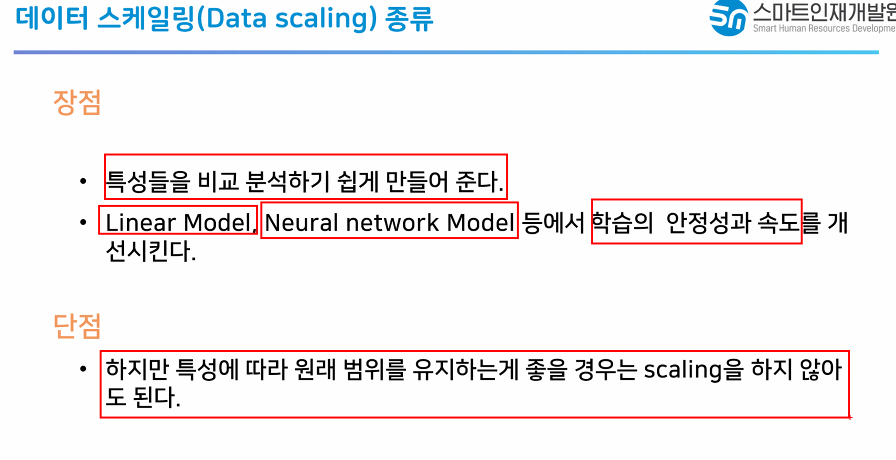

In [87]:
#StandardScaler
# 평균이 0 이고 분산이 1인 형태로변환시키는 것

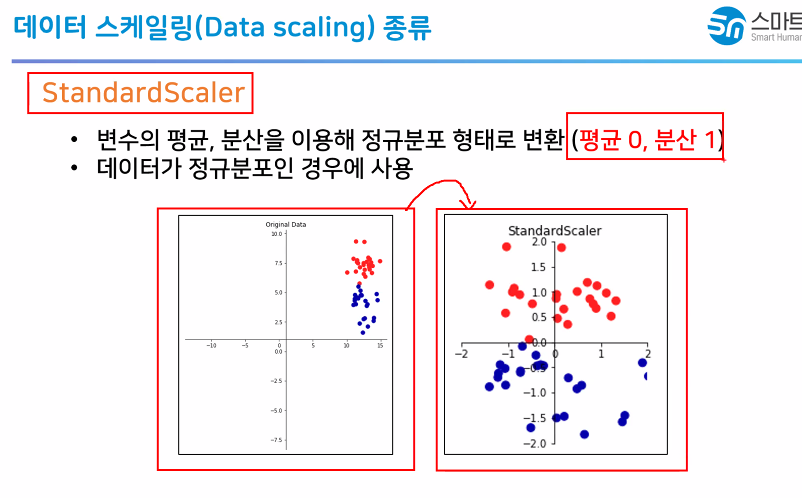

In [88]:
# MinMaxScaler
# 이상치가 존재시 사용을 못함!

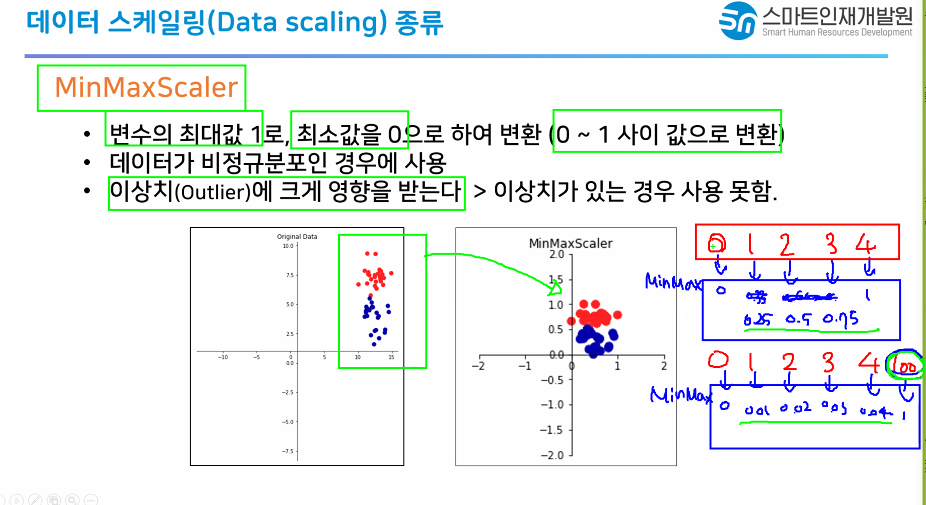
- 100이라는 이상치로 인해 이상하게 되버림!

In [90]:
# RobustScaler
# 실질적은 값으로 사용하는것이 아니라서 이상치가 존재해도 사용이 가능하다

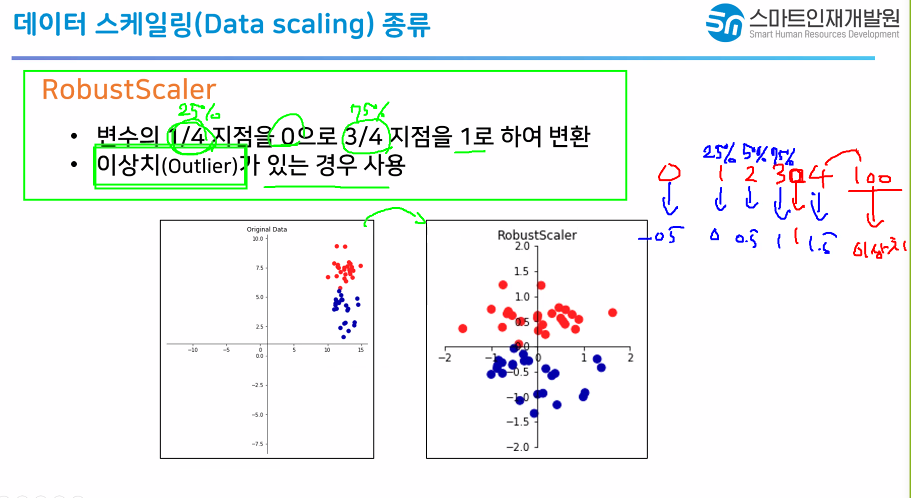
- 이상치는 그대로 표현이 된다

In [91]:
# Normalizer

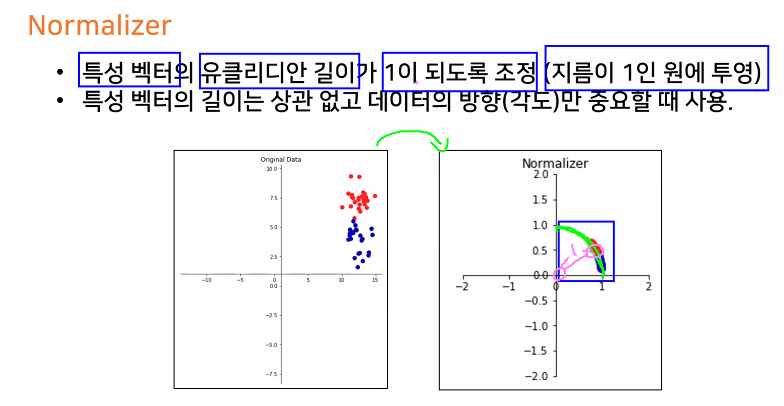
- 지름이 아니라 반지름이다

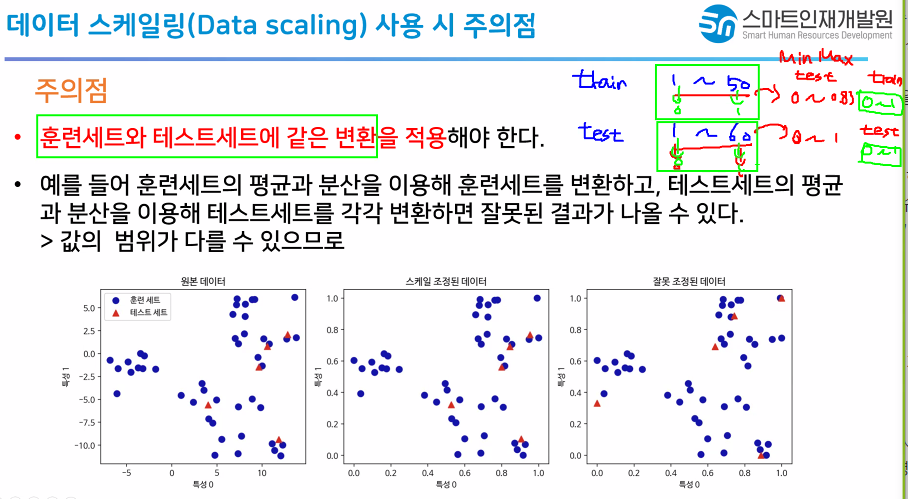
- 값의 범위가 달라질 수 있기 때문에 같은 변환 적용!